<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge

# Part 4: Model Testing with Kaggle Dataset

<h3 style='text-align: justify;'> This section consists of model testing for the 5 different models. In this section, the train dataset in this section is mainly used as the training datset while a new unseen test dataset is used to predict the sale price. With a new test dataset, data cleaning is required to be done on the test data set and then filtered to the features that are previously defined to have an influence on the sale price. One hot encoding and standard scaling need to be done on the train and test dataset before fitting to the models before fitting to the 5 different models for prediction. After the prediction of the sale price on the test dataset, the results for the 5 different models exported and submitted to Kaggle.</h3>

### Contents:
* [Organisation of Notebooks](#Organisation-of-Notebooks)
* [Data Dictionary](#Data-Dictionary)
* [Import Libraries and Dataset](#Import-Libraries-and-Dataset)
* [Functions for One Hot Encoding, Standard Scaling and Subsetting Dataframe into Feature Type](#Functions-for-One-Hot-Encoding,-Standard-Scaling-and-Subsetting-Dataframe-into-Feature-Type)
* [Data Cleaning for Test Dataset](#Data-Cleaning-for-Test-Dataset)
* [One Hot Encoding on Nominal Features for Train and Test Datasets](#One-Hot-Encoding-on-Nominal-Features-for-Train-and-Test-Datasets)
* [Standard Scale on the Continuous and Ordinal Features for Train and Test Datasets](#Standard-Scale-on-the-Continuous-and-Ordinal-Features-for-Train-and-Test-Datasets)
* [Model Testing](#Model-Testing)
    * [Simple Model](#Simple-Model)
    * [Linear Regression](#Linear-Regression)
    * [RIdge Regression](#Ridge-Regression)
    * [Lasso Regression](#Lasso-Regression)
    * [ElasticNet Regression](#ElasticNet-Regression)
* [Export the prediction of Sale Price for Kaggle submission](#Export-the-prediction-of-Sale-Price-for-Kaggle-submission)
    * [Export Simple Model](#Export-Simple-Model)
    * [Export Linear Regression](#Export-Linear-Regression)
    * [Export RIdge Regression](#Export-Ridge-Regression)
    * [Export Lasso Regression](#Export-Lasso-Regression)
    * [Export ElasticNet Regression](#Export-ElasticNet-Regression)
* [Conclusion](#Conclusion)
* [Summary](#Summary)

## Organistation of Notebooks:
1. [Introduction](./01_Introduction.ipynb)
2. [Data Preprocessing and EDA](./02_EDA_DataPreprocessing_FeatureEngineering.ipynb)
3. [Model Validation](./003_ModelValidation.ipynb)
4. Model Testing with Kaggle Dataset

## Data Dictionary

| Feature | Feature Type | Data Type | Dataset | Description |
| --- | --- | --- | --- | --- |
| Total Bsmt BF | Continous | Float | Train/Test | Total Basement Area in Square Feet |
| Gr Liv Area | Continuous | Integer | Train/Test | Total Living Area above Ground in Square Feet |
| Overall Qual | Ordinal | Integer | Train/Test | Rating of Overall Material and Finish of the House |
| Exter Qual | Ordinal | Integer | Train/Test | Quality of Exterior Material |
| Heating QC | Ordinal | Integer | Train/Test | Quality and Condition of Heating |
| Kitchen Qual | Ordinal | Integer | Train/Test | Kitchen Quality |
| Garage Finish | Ordinal | Integer | Train/Test | Interior Finiah of Garage |
| MS SubClass | Nominal | Object | Train/Test | Type of Dwelling Sold|
| MS Zoning | Nominal | Object | Train/Test | General Zoning Classification |
| Lot Config | Nominal | Object | Train/Test | Lot Configuration |
| Neighborhood | Nominal | Object | Train/Test | Physical Locations within Ames City |
| House Style | Nominal | Object | Train/Test | Style of Dwelling |
| Roof Style | Nominal | Object | Train/Test | Roof Type |
| Exterior 1st | Nominal | Object | Train/Test | Exterior covering the the House |
| Exterior 2nd | Nominal | Object | Train/Test | Exterior covering the House if more than 1 Material |
| Mas Vnr Type | Nominal | Object | Train/Test | Masonary Veneer Type |
| Foundation | Nominal | Object | Train/Test | Foundation Type |
| Garage Type | Nominal | Object | Train/Test | Garage Location |
| SalePrice | Continuous | Integer | Train | Sale Price ($$) |

## Import Libraries and Dataset

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
# import the train set that is filtered in section 2
train = pd.read_csv('./datasets/train_filtered.csv', na_filter=False)

In [4]:
test = pd.read_csv('./datasets/new_test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Total_Bsmt_SF  2051 non-null   float64
 1   Gr_Liv_Area    2051 non-null   int64  
 2   Overall_Qual   2051 non-null   int64  
 3   Exter_Qual     2051 non-null   int64  
 4   Heating_QC     2051 non-null   int64  
 5   Kitchen_Qual   2051 non-null   int64  
 6   Garage_Finish  2051 non-null   int64  
 7   MS_SubClass    2051 non-null   object 
 8   MS_Zoning      2051 non-null   object 
 9   Lot_Config     2051 non-null   object 
 10  Neighborhood   2051 non-null   object 
 11  House_Style    2051 non-null   object 
 12  Roof_Style     2051 non-null   object 
 13  Exterior_1st   2051 non-null   object 
 14  Exterior_2nd   2051 non-null   object 
 15  Mas_Vnr_Type   2051 non-null   object 
 16  Foundation     2051 non-null   object 
 17  Garage_Type    2051 non-null   object 
 18  SalePric

In [6]:
# replace whitespace with _
test = test.rename(columns=lambda x: x.replace(' ','_'))

## Functions for One Hot Encoding, Standard Scaling and Subsetting Dataframe into Feature Type
### Define some functions to one hot encode features, standard scale features and subsetting the different types of features

In [7]:
def ohe_features(df_train, df_test, features, ohe):#, train=True):

    encoded_train = ohe.fit_transform(df_train[features])
    encoded_features = ohe.get_feature_names(features)
    encoded_test = ohe.transform(df_test[features])
    return encoded_train, encoded_features, encoded_test

def subset_features(df, feature_type):
    return df[feature_type]

def standard_scale_features(df_train, df_test , features, ss):#, train=True):

    df_train_sc = ss.fit_transform(df_train[features])
    df_test_sc = ss.transform(df_test[features])
    return df_train_sc, df_test_sc

## Data Cleaning for Test Dataset

### Filter the features for test dataset to be the same as the filtered train dataset that we have in Part 2 and to impute any missing/relevant values for those features before we can test our models

In [8]:
cont_features = [
    'Total_Bsmt_SF', 
    'Gr_Liv_Area'
]

ordinal_features = [
    'Overall_Qual', 
    'Exter_Qual', 
    'Heating_QC', 
    'Kitchen_Qual', 
    'Garage_Finish'
]

nominal_features = [
    'MS_SubClass', 
    'MS_Zoning', 
    'Lot_Config', 
    'Neighborhood',
    'House_Style',
    'Roof_Style',
    'Exterior_1st',
    'Exterior_2nd',
    'Mas_Vnr_Type',
    'Foundation',
    'Garage_Type'
]

In [9]:
selected_features = [cont_features, ordinal_features, nominal_features]

In [10]:
selected_features = list(np.concatenate(selected_features).flat)
selected_features

['Total_Bsmt_SF',
 'Gr_Liv_Area',
 'Overall_Qual',
 'Exter_Qual',
 'Heating_QC',
 'Kitchen_Qual',
 'Garage_Finish',
 'MS_SubClass',
 'MS_Zoning',
 'Lot_Config',
 'Neighborhood',
 'House_Style',
 'Roof_Style',
 'Exterior_1st',
 'Exterior_2nd',
 'Mas_Vnr_Type',
 'Foundation',
 'Garage_Type']

In [11]:
test[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Total_Bsmt_SF  879 non-null    int64 
 1   Gr_Liv_Area    879 non-null    int64 
 2   Overall_Qual   879 non-null    int64 
 3   Exter_Qual     879 non-null    object
 4   Heating_QC     879 non-null    object
 5   Kitchen_Qual   879 non-null    object
 6   Garage_Finish  834 non-null    object
 7   MS_SubClass    879 non-null    int64 
 8   MS_Zoning      879 non-null    object
 9   Lot_Config     879 non-null    object
 10  Neighborhood   879 non-null    object
 11  House_Style    879 non-null    object
 12  Roof_Style     879 non-null    object
 13  Exterior_1st   879 non-null    object
 14  Exterior_2nd   879 non-null    object
 15  Mas_Vnr_Type   878 non-null    object
 16  Foundation     879 non-null    object
 17  Garage_Type    835 non-null    object
dtypes: int64(4), object(14)
memory

In [12]:
# check which columns with null value, can use len to check how many columns
# any() means any of the rows with null, all() means all of the rows with null
test[selected_features].columns[test[selected_features].isnull().any()]

Index(['Garage_Finish', 'Mas_Vnr_Type', 'Garage_Type'], dtype='object')

### Observations:

There are 3 features namely 'Garage Finish', 'Mas Vnr Type' and 'Garage Type' that are having null values in the test dataset after subsetting using the selected features to be used for predicting the Sale Price. 

Mas Vnr Type and Garage Type are the nominal features and Garage Finish is a ordinal feature. Hence, the next step is to impute the values to the missing features the same way that are done for the train dataset.

In [13]:
# convert the selected features to 0/NA if there is null value for them
# all can change to 0
test[cont_features] = test[cont_features].fillna(0)
# all can change to NA
test[ordinal_features] = test[ordinal_features].fillna('NA')
# all change to NA except Mas Vnr Type to None, 4 vars with null values
for var in nominal_features:
    if var == 'Mas_Vnr_Type':
        test[var] = test[var].fillna('None')
    test[var] = test[var].fillna('NA')
# test[nominal_features] = test[nominal_features].fillna('NA')
# MS SubClass in the nominal variable need to change from int to object type
test['MS_SubClass'] = test['MS_SubClass'].map(lambda x: str(x))

In [14]:
test[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Total_Bsmt_SF  879 non-null    int64 
 1   Gr_Liv_Area    879 non-null    int64 
 2   Overall_Qual   879 non-null    int64 
 3   Exter_Qual     879 non-null    object
 4   Heating_QC     879 non-null    object
 5   Kitchen_Qual   879 non-null    object
 6   Garage_Finish  879 non-null    object
 7   MS_SubClass    879 non-null    object
 8   MS_Zoning      879 non-null    object
 9   Lot_Config     879 non-null    object
 10  Neighborhood   879 non-null    object
 11  House_Style    879 non-null    object
 12  Roof_Style     879 non-null    object
 13  Exterior_1st   879 non-null    object
 14  Exterior_2nd   879 non-null    object
 15  Mas_Vnr_Type   879 non-null    object
 16  Foundation     879 non-null    object
 17  Garage_Type    879 non-null    object
dtypes: int64(3), object(15)
memory

In [15]:
# check which columns with null value, can use len to check how many columns
# any() means any of the rows with null, all() means all of the rows with null
test[selected_features].columns[test[selected_features].isnull().any()]

Index([], dtype='object')

In [16]:
test[selected_features].head()

,Total_Bsmt_SF,Gr_Liv_Area,Overall_Qual,Exter_Qual,Heating_QC,Kitchen_Qual,Garage_Finish,MS_SubClass,MS_Zoning,Lot_Config,Neighborhood,House_Style,Roof_Style,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Foundation,Garage_Type
0,1020,1928,6,TA,Gd,Fa,Unf,190,RM,Inside,OldTown,2Story,Gable,AsbShng,AsbShng,None,Stone,Detchd
1,1967,1967,5,TA,TA,TA,Fin,90,RL,Inside,Sawyer,1Story,Gable,Plywood,Plywood,None,CBlock,Attchd
2,654,1496,7,Gd,Ex,Gd,RFn,60,RL,Inside,Gilbert,2Story,Gable,VinylSd,VinylSd,None,PConc,Attchd
3,968,968,5,Gd,TA,TA,Unf,30,RM,Inside,OldTown,1Story,Gable,Wd Sdng,Wd Sdng,None,CBlock,Detchd
4,1394,1394,6,TA,Gd,TA,RFn,20,RL,Inside,NAmes,1Story,Gable,Plywood,Plywood,BrkFace,CBlock,Attchd


In [17]:
# Overall Qual, already in int datatype
# so only need to convert for the rest of ordinal variables
# NA is assigned to 0
def convert_ordinal_features(df, features):
    for feature in features:
        if feature == 'Exter_Qual' or feature == 'Heating_QC' or feature == 'Kitchen_Qual':
            df[feature] = df[feature].map({'Po':1, 'Fa':2, 'TA':3,'Gd':4, 'Ex':5})
        elif feature == 'Garage_Finish':
            df[feature] = df[feature].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})
#     return df

In [18]:
# convert ordinal variables into integers for test dataset so that it matches the train dataset
convert_ordinal_features(test, ordinal_features)

In [19]:
test[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Total_Bsmt_SF  879 non-null    int64 
 1   Gr_Liv_Area    879 non-null    int64 
 2   Overall_Qual   879 non-null    int64 
 3   Exter_Qual     879 non-null    int64 
 4   Heating_QC     879 non-null    int64 
 5   Kitchen_Qual   879 non-null    int64 
 6   Garage_Finish  879 non-null    int64 
 7   MS_SubClass    879 non-null    object
 8   MS_Zoning      879 non-null    object
 9   Lot_Config     879 non-null    object
 10  Neighborhood   879 non-null    object
 11  House_Style    879 non-null    object
 12  Roof_Style     879 non-null    object
 13  Exterior_1st   879 non-null    object
 14  Exterior_2nd   879 non-null    object
 15  Mas_Vnr_Type   879 non-null    object
 16  Foundation     879 non-null    object
 17  Garage_Type    879 non-null    object
dtypes: int64(7), object(11)
memory

In [20]:
test[selected_features].head()

,Total_Bsmt_SF,Gr_Liv_Area,Overall_Qual,Exter_Qual,Heating_QC,Kitchen_Qual,Garage_Finish,MS_SubClass,MS_Zoning,Lot_Config,Neighborhood,House_Style,Roof_Style,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Foundation,Garage_Type
0,1020,1928,6,3,4,2,1,190,RM,Inside,OldTown,2Story,Gable,AsbShng,AsbShng,None,Stone,Detchd
1,1967,1967,5,3,3,3,3,90,RL,Inside,Sawyer,1Story,Gable,Plywood,Plywood,None,CBlock,Attchd
2,654,1496,7,4,5,4,2,60,RL,Inside,Gilbert,2Story,Gable,VinylSd,VinylSd,None,PConc,Attchd
3,968,968,5,4,3,3,1,30,RM,Inside,OldTown,1Story,Gable,Wd Sdng,Wd Sdng,None,CBlock,Detchd
4,1394,1394,6,3,4,3,2,20,RL,Inside,NAmes,1Story,Gable,Plywood,Plywood,BrkFace,CBlock,Attchd


In [21]:
neigh_high = [
     'StoneBr', 
     'NridgHt', 
     'NoRidge', 
     'GrnHill', 
     'Veenker'
    ]

neigh_mid = [
    'ClearCr',
    'Somerst',
    'Timber',
    'CollgCr',
    'Crawfor',
    'Blmngtn',
    'Greens',
    'NWAmes',
    'SawyerW',
    'Gilbert'
    ]

neigh_low = [
     'NPkVill',
     'NAmes',
     'Blueste',
     'Landmrk',
     'SWISU',
     'Sawyer',
     'BrkSide',
     'Edwards',
     'OldTown',
     'BrDale',
     'IDOTRR',
     'MeadowV'
    ]

In [22]:
ms_subclass_high = ['60', '120']

ms_subclass_mid = ['80', '75', '20', '85', '150', '70', '160']

ms_subclass_low = ['90', '50', '190', '40', '45', '180', '30']

In [23]:
def convert_subclass(x, var):
    if var == 'MS_SubClass':
        if x in ms_subclass_low:
            return 'low'
        elif x in ms_subclass_mid:
            return 'mid'
        elif x in ms_subclass_high:
            return 'high'
    elif var == 'Neighborhood':
        if x in neigh_low:
            return 'low'
        elif x in neigh_mid:
            return 'mid'
        elif x in neigh_high:
            return 'high'
# def mapper(x):
#     if x in ['90', '50', '190', '40', '45', '180', '30']:
#         return 'low'
#     elif x in ['80', '75', '20', '85', '150', '70', '160']:
#         return 'mid'
#     elif x in ['60', '120']:
#         return 'high'

def convert_feature_value(df, features):
    for feature in features:
        df[feature] = df[feature].apply(convert_subclass, var=feature)

In [24]:
# convert nominal features like 'MS SubClass', 'Neighborhood' into 3 sub-classes
nom_features =['MS_SubClass', 'Neighborhood']
convert_feature_value(test, nom_features)

In [25]:
test['MS_SubClass'].head()

0     low
1     low
2    high
3     low
4     mid
Name: MS_SubClass, dtype: object

In [26]:
test['Neighborhood'].head()

0    low
1    low
2    mid
3    low
4    low
Name: Neighborhood, dtype: object

In [27]:
test_filtered = test[selected_features]
test_filtered.head()

,Total_Bsmt_SF,Gr_Liv_Area,Overall_Qual,Exter_Qual,Heating_QC,Kitchen_Qual,Garage_Finish,MS_SubClass,MS_Zoning,Lot_Config,Neighborhood,House_Style,Roof_Style,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Foundation,Garage_Type
0,1020,1928,6,3,4,2,1,low,RM,Inside,low,2Story,Gable,AsbShng,AsbShng,None,Stone,Detchd
1,1967,1967,5,3,3,3,3,low,RL,Inside,low,1Story,Gable,Plywood,Plywood,None,CBlock,Attchd
2,654,1496,7,4,5,4,2,high,RL,Inside,mid,2Story,Gable,VinylSd,VinylSd,None,PConc,Attchd
3,968,968,5,4,3,3,1,low,RM,Inside,low,1Story,Gable,Wd Sdng,Wd Sdng,None,CBlock,Detchd
4,1394,1394,6,3,4,3,2,mid,RL,Inside,low,1Story,Gable,Plywood,Plywood,BrkFace,CBlock,Attchd


## One Hot Encoding on Nominal Features for Train and Test Datasets

In [28]:
# instantiate ohe
# sparse=False -> give array
# handle_unknown='ignore' -> ignore unseen col in train set
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# one hot encode the nonminal features
# returns encoded nominal data, encoded nominal features
encoded_nominal_data, encoded_nominal_features, encoded_nominal_data_test = ohe_features(train, test_filtered, nominal_features, ohe)
# encoded_nominal_data_test = ohe_features(X_test, nominal_features, ohe, False) 

In [29]:
encoded_nominal_data, encoded_nominal_features, encoded_nominal_data_test

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 1., 0.],
        ...,
        [0., 1., 0., ..., 0., 1., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array(['MS_SubClass_high', 'MS_SubClass_low', 'MS_SubClass_mid',
        'MS_Zoning_A (agr)', 'MS_Zoning_C (all)', 'MS_Zoning_FV',
        'MS_Zoning_I (all)', 'MS_Zoning_RH', 'MS_Zoning_RL',
        'MS_Zoning_RM', 'Lot_Config_Corner', 'Lot_Config_CulDSac',
        'Lot_Config_FR2', 'Lot_Config_FR3', 'Lot_Config_Inside',
        'Neighborhood_high', 'Neighborhood_low', 'Neighborhood_mid',
        'House_Style_1.5Fin', 'House_Style_1.5Unf', 'House_Style_1Story',
        'House_Style_2.5Fin', 'House_Style_2.5Unf', 'House_Style_2Story',
        'House_Style_SFoyer', 'House_Style_SLvl', 'Roof_Style_Flat',
        'Roof_Style_Gable', 'Roof_Style_Gambrel', 'Roof_Style_Hip',
        'Roof_Style_Mansard', 'Roof_Style_Shed', 'Exterior_1st_AsbShng',

In [30]:
# put the encoded nominal data and encoded nominal features into a df
train_nominal_encoded = pd.DataFrame(data=encoded_nominal_data , columns=encoded_nominal_features)
test_nominal_encoded = pd.DataFrame(data=encoded_nominal_data_test , columns=encoded_nominal_features)

In [31]:
train_nominal_encoded.head()

,MS_SubClass_high,MS_SubClass_low,MS_SubClass_mid,MS_Zoning_A (agr),MS_Zoning_C (all),MS_Zoning_FV,MS_Zoning_I (all),MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Lot_Config_Corner,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Neighborhood_high,Neighborhood_low,Neighborhood_mid,House_Style_1.5Fin,House_Style_1.5Unf,House_Style_1Story,House_Style_2.5Fin,House_Style_2.5Unf,House_Style_2Story,House_Style_SFoyer,House_Style_SLvl,Roof_Style_Flat,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,Exterior_1st_AsbShng,Exterior_1st_AsphShn,Exterior_1st_BrkComm,Exterior_1st_BrkFace,Exterior_1st_CBlock,Exterior_1st_CemntBd,Exterior_1st_HdBoard,Exterior_1st_ImStucc,Exterior_1st_MetalSd,Exterior_1st_Plywood,Exterior_1st_Stone,Exterior_1st_Stucco,Exterior_1st_VinylSd,Exterior_1st_Wd Sdng,Exterior_1st_WdShing,Exterior_2nd_AsbShng,Exterior_2nd_AsphShn,Exterior_2nd_Brk Cmn,Exterior_2nd_BrkFace,Exterior_2nd_CBlock,Exterior_2nd_CmentBd,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Plywood,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,Mas_Vnr_Type_BrkCmn,Mas_Vnr_Type_BrkFace,Mas_Vnr_Type_None,Mas_Vnr_Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage_Type_2Types,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Garage_Type_NA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
test_nominal_encoded.head()

,MS_SubClass_high,MS_SubClass_low,MS_SubClass_mid,MS_Zoning_A (agr),MS_Zoning_C (all),MS_Zoning_FV,MS_Zoning_I (all),MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Lot_Config_Corner,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Neighborhood_high,Neighborhood_low,Neighborhood_mid,House_Style_1.5Fin,House_Style_1.5Unf,House_Style_1Story,House_Style_2.5Fin,House_Style_2.5Unf,House_Style_2Story,House_Style_SFoyer,House_Style_SLvl,Roof_Style_Flat,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,Exterior_1st_AsbShng,Exterior_1st_AsphShn,Exterior_1st_BrkComm,Exterior_1st_BrkFace,Exterior_1st_CBlock,Exterior_1st_CemntBd,Exterior_1st_HdBoard,Exterior_1st_ImStucc,Exterior_1st_MetalSd,Exterior_1st_Plywood,Exterior_1st_Stone,Exterior_1st_Stucco,Exterior_1st_VinylSd,Exterior_1st_Wd Sdng,Exterior_1st_WdShing,Exterior_2nd_AsbShng,Exterior_2nd_AsphShn,Exterior_2nd_Brk Cmn,Exterior_2nd_BrkFace,Exterior_2nd_CBlock,Exterior_2nd_CmentBd,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Plywood,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,Mas_Vnr_Type_BrkCmn,Mas_Vnr_Type_BrkFace,Mas_Vnr_Type_None,Mas_Vnr_Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage_Type_2Types,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Garage_Type_NA
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# combine continous and ordinal features together for standard scaling purpose
cont_ordinal_features = list(np.concatenate([cont_features, ordinal_features]).flat)
cont_ordinal_features

['Total_Bsmt_SF',
 'Gr_Liv_Area',
 'Overall_Qual',
 'Exter_Qual',
 'Heating_QC',
 'Kitchen_Qual',
 'Garage_Finish']

In [34]:
# merge continuous and ordinal 
# one usage is to merge back to the encoded nominal features for X_train
# another usage is to standard scale the continuous and ordinal features before merging back
# to encoded nominal features for ridge, lasso and enet regression model
train_cont_ordinal = subset_features(train, cont_ordinal_features)
test_cont_ordinal = subset_features(test_filtered, cont_ordinal_features)
# reset the index before merging with encoded nominal features with continuous and ordinal features
train_cont_ordinal.reset_index(drop=True, inplace=True)
test_cont_ordinal.reset_index(drop=True, inplace=True)

In [35]:
# X_train and X_test to be used for linear regression model
X_train = train_cont_ordinal.merge(train_nominal_encoded, how='left', left_index=True, right_index=True)
X_test = test_cont_ordinal.merge(test_nominal_encoded, how='left', left_index=True, right_index=True)
# X_train.drop()

In [36]:
X_train.head()

,Total_Bsmt_SF,Gr_Liv_Area,Overall_Qual,Exter_Qual,Heating_QC,Kitchen_Qual,Garage_Finish,MS_SubClass_high,MS_SubClass_low,MS_SubClass_mid,MS_Zoning_A (agr),MS_Zoning_C (all),MS_Zoning_FV,MS_Zoning_I (all),MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Lot_Config_Corner,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Neighborhood_high,Neighborhood_low,Neighborhood_mid,House_Style_1.5Fin,House_Style_1.5Unf,House_Style_1Story,House_Style_2.5Fin,House_Style_2.5Unf,House_Style_2Story,House_Style_SFoyer,House_Style_SLvl,Roof_Style_Flat,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,Exterior_1st_AsbShng,Exterior_1st_AsphShn,Exterior_1st_BrkComm,Exterior_1st_BrkFace,Exterior_1st_CBlock,Exterior_1st_CemntBd,Exterior_1st_HdBoard,Exterior_1st_ImStucc,Exterior_1st_MetalSd,Exterior_1st_Plywood,Exterior_1st_Stone,Exterior_1st_Stucco,Exterior_1st_VinylSd,Exterior_1st_Wd Sdng,Exterior_1st_WdShing,Exterior_2nd_AsbShng,Exterior_2nd_AsphShn,Exterior_2nd_Brk Cmn,Exterior_2nd_BrkFace,Exterior_2nd_CBlock,Exterior_2nd_CmentBd,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Plywood,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,Mas_Vnr_Type_BrkCmn,Mas_Vnr_Type_BrkFace,Mas_Vnr_Type_None,Mas_Vnr_Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage_Type_2Types,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Garage_Type_NA
0,725.0,1479,6,4,5,4,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,913.0,2122,7,4,5,4,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1057.0,1057,5,3,3,4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,384.0,1444,5,3,4,3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,676.0,1445,6,3,3,3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
X_test.head()

,Total_Bsmt_SF,Gr_Liv_Area,Overall_Qual,Exter_Qual,Heating_QC,Kitchen_Qual,Garage_Finish,MS_SubClass_high,MS_SubClass_low,MS_SubClass_mid,MS_Zoning_A (agr),MS_Zoning_C (all),MS_Zoning_FV,MS_Zoning_I (all),MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Lot_Config_Corner,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Neighborhood_high,Neighborhood_low,Neighborhood_mid,House_Style_1.5Fin,House_Style_1.5Unf,House_Style_1Story,House_Style_2.5Fin,House_Style_2.5Unf,House_Style_2Story,House_Style_SFoyer,House_Style_SLvl,Roof_Style_Flat,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,Exterior_1st_AsbShng,Exterior_1st_AsphShn,Exterior_1st_BrkComm,Exterior_1st_BrkFace,Exterior_1st_CBlock,Exterior_1st_CemntBd,Exterior_1st_HdBoard,Exterior_1st_ImStucc,Exterior_1st_MetalSd,Exterior_1st_Plywood,Exterior_1st_Stone,Exterior_1st_Stucco,Exterior_1st_VinylSd,Exterior_1st_Wd Sdng,Exterior_1st_WdShing,Exterior_2nd_AsbShng,Exterior_2nd_AsphShn,Exterior_2nd_Brk Cmn,Exterior_2nd_BrkFace,Exterior_2nd_CBlock,Exterior_2nd_CmentBd,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Plywood,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,Mas_Vnr_Type_BrkCmn,Mas_Vnr_Type_BrkFace,Mas_Vnr_Type_None,Mas_Vnr_Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage_Type_2Types,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Garage_Type_NA
0,1020,1928,6,3,4,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1967,1967,5,3,3,3,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,654,1496,7,4,5,4,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,968,968,5,4,3,3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1394,1394,6,3,4,3,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Standard Scale on the Continuous and Ordinal Features for Train and Test Datasets

### Standard scale the continuous and ordinal features to be used for Ridge. Lasso and ElasticNet regession model
#### Preprocessing is required for Ridge, Lasso and ElasticNet regression model as there is a penalty term that will try to minimize the mean square error by a hyperparameter. Hence, there is a need to scale the continuous and ordinal features so that the hyperparameter will influence the features equally.

In [38]:
# instantiate standard scaler
ss = StandardScaler()
# scale the X_train and X_test respectively using the function specifed previously
X_train_sc, X_test_sc = standard_scale_features(X_train, X_test, cont_ordinal_features, ss)

In [39]:
# after ss, X_train_sc and X_test_sc become array
# need to convert them back into df
X_train_sc = pd.DataFrame(data=X_train_sc , columns=cont_ordinal_features)
X_test_sc = pd.DataFrame(data=X_test_sc , columns=cont_ordinal_features)

# merge back with nominal features
# merged the encoded nominal features with continous and ordinal features
X_train_sc = X_train_sc.merge(train_nominal_encoded, how='left', left_index=True, right_index=True)
X_test_sc = X_test_sc.merge(test_nominal_encoded, how='left', left_index=True, right_index=True)

In [40]:
X_train_sc.head()

,Total_Bsmt_SF,Gr_Liv_Area,Overall_Qual,Exter_Qual,Heating_QC,Kitchen_Qual,Garage_Finish,MS_SubClass_high,MS_SubClass_low,MS_SubClass_mid,MS_Zoning_A (agr),MS_Zoning_C (all),MS_Zoning_FV,MS_Zoning_I (all),MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Lot_Config_Corner,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Neighborhood_high,Neighborhood_low,Neighborhood_mid,House_Style_1.5Fin,House_Style_1.5Unf,House_Style_1Story,House_Style_2.5Fin,House_Style_2.5Unf,House_Style_2Story,House_Style_SFoyer,House_Style_SLvl,Roof_Style_Flat,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,Exterior_1st_AsbShng,Exterior_1st_AsphShn,Exterior_1st_BrkComm,Exterior_1st_BrkFace,Exterior_1st_CBlock,Exterior_1st_CemntBd,Exterior_1st_HdBoard,Exterior_1st_ImStucc,Exterior_1st_MetalSd,Exterior_1st_Plywood,Exterior_1st_Stone,Exterior_1st_Stucco,Exterior_1st_VinylSd,Exterior_1st_Wd Sdng,Exterior_1st_WdShing,Exterior_2nd_AsbShng,Exterior_2nd_AsphShn,Exterior_2nd_Brk Cmn,Exterior_2nd_BrkFace,Exterior_2nd_CBlock,Exterior_2nd_CmentBd,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Plywood,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,Mas_Vnr_Type_BrkCmn,Mas_Vnr_Type_BrkFace,Mas_Vnr_Type_None,Mas_Vnr_Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage_Type_2Types,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Garage_Type_NA
0,-0.739158,-0.040634,-0.078644,1.010273,0.873079,0.725399,0.308137,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.321193,1.244529,0.622656,1.010273,0.873079,0.725399,0.308137,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.001049,-0.884084,-0.779944,-0.690934,-1.201874,0.725399,-0.804519,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.497275,-0.110588,-0.779944,-0.690934,-0.164398,-0.777423,1.420793,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.848096,-0.108589,-0.078644,-0.690934,-1.201874,-0.777423,-0.804519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
X_test_sc.head()

,Total_Bsmt_SF,Gr_Liv_Area,Overall_Qual,Exter_Qual,Heating_QC,Kitchen_Qual,Garage_Finish,MS_SubClass_high,MS_SubClass_low,MS_SubClass_mid,MS_Zoning_A (agr),MS_Zoning_C (all),MS_Zoning_FV,MS_Zoning_I (all),MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Lot_Config_Corner,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Neighborhood_high,Neighborhood_low,Neighborhood_mid,House_Style_1.5Fin,House_Style_1.5Unf,House_Style_1Story,House_Style_2.5Fin,House_Style_2.5Unf,House_Style_2Story,House_Style_SFoyer,House_Style_SLvl,Roof_Style_Flat,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,Exterior_1st_AsbShng,Exterior_1st_AsphShn,Exterior_1st_BrkComm,Exterior_1st_BrkFace,Exterior_1st_CBlock,Exterior_1st_CemntBd,Exterior_1st_HdBoard,Exterior_1st_ImStucc,Exterior_1st_MetalSd,Exterior_1st_Plywood,Exterior_1st_Stone,Exterior_1st_Stucco,Exterior_1st_VinylSd,Exterior_1st_Wd Sdng,Exterior_1st_WdShing,Exterior_2nd_AsbShng,Exterior_2nd_AsphShn,Exterior_2nd_Brk Cmn,Exterior_2nd_BrkFace,Exterior_2nd_CBlock,Exterior_2nd_CmentBd,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Plywood,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,Mas_Vnr_Type_BrkCmn,Mas_Vnr_Type_BrkFace,Mas_Vnr_Type_None,Mas_Vnr_Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage_Type_2Types,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Garage_Type_NA
0,-0.083308,0.856782,-0.078644,-0.690934,-0.164398,-2.280245,-0.804519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.022080,0.934731,-0.779944,-0.690934,-1.201874,-0.777423,1.420793,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.897006,-0.006656,0.622656,1.010273,0.873079,0.725399,0.308137,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.198916,-1.061968,-0.779944,1.010273,-1.201874,-0.777423,-0.804519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.748175,-0.210523,-0.078644,-0.690934,-0.164398,-0.777423,0.308137,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Model Testing

### Simple Model
#### Linear Regression Model using 2 continuous features like the total basement square feet area (Total_Bsment) and the above ground level square feet area (Gr_Liv_Area) as a baseline

In [42]:
# Simple model use sq of bsmt and gr for sale price
# subset the X_train using the 2 continuous features for train dataset
X_train_simple = X_train[['Total_Bsmt_SF', 'Gr_Liv_Area']]
# subset the X_test using the 2 continuous features for test dataset
X_test_simple = X_test[['Total_Bsmt_SF', 'Gr_Liv_Area']]
# subset y_train using the SalePrice from train dataset
y_train = train['SalePrice']

In [43]:
# instantiate model
lr = LinearRegression()

# fit the model
# y_train and y_test remain unchanged as SalePrice is still the target to predict
lr.fit(X_train_simple, y_train)

LinearRegression()

In [44]:
# cross validation with k-folds=5 for the simple model
# using mean sq error as the metrics
cross_val_score(
    lr,
    X_train_simple,
    y_train,
    cv=5,
    scoring='neg_mean_squared_error'
).mean()

-2499650349.5862794

In [45]:
# predict the sale price using the simple model with 2 continuous features for train set
y_pred_simple = lr.predict(X_train_simple)
# compute the train mean sqrt error
metrics.mean_squared_error(y_pred_simple, y_train)**0.5

49545.36016820005

In [46]:
lr.coef_

array([69.40384401, 82.05127111])

In [47]:
lr.intercept_

-14944.856804102135

In [48]:
# predict the sale price using the simple model with 2 continuous features for test set
y_pred_simple_test = lr.predict(X_test_simple)
# compute the train mean sqrt error
y_pred_simple_test

array([214041.91478981, 282967.35463862, 153193.95876212, 131663.69463289,
       196183.57367437, 112549.63007961, 135049.12296524, 177100.22916914,
       181200.50763237, 173005.71638283, 169376.01829798, 142568.46292159,
       192750.69573501, 294795.72558907, 193817.27523805,  95003.84648737,
       164233.76661713, 147566.48172058, 221659.29406158, 191562.37858597,
       145597.56522401, 115912.36266032, 229055.81437422, 131222.60473491,
       169527.4734131 , 115912.36266032, 177284.00085595, 172785.71243269,
       136499.18094036,  65708.91712453, 115003.63196959, 138308.07702655,
       287731.26550402, 163330.46112025, 211026.17495622, 146883.43363546,
       200620.30850717,  66942.31176671,  67009.20352959, 189412.51649387,
       127961.05157104, 204349.41544236, 167713.46614321, 166850.10048285,
       212389.2709923 , 133226.55040009, 195450.24989098, 121701.00265845,
       126817.13094902, 142568.46292159, 150751.4352801 , 195161.15610698,
       229655.15411608, 1

## Linear Regression
### Linear Regression with selected continuous, ordinal and nominal features (18)

In [49]:
# merge all the features together 
# so that later we can check for which features have top 3 highest coefficient
features = list(np.concatenate([cont_features, ordinal_features, encoded_nominal_features]).flat)
len(features)

86

In [50]:
# use the X_train for X
# contains the selected features
# use y_train specified above from simple model
X_train_lr_selected = X_train
y_train_lr_selected = y_train
# fit the model
lr.fit(X_train_lr_selected, y_train_lr_selected)

LinearRegression()

In [51]:
# cross validation with k-folds=5 for the lr model with 18 selected features
# using mean sq error as the metrics
cross_val_score(
    lr,
    X_train_lr_selected,
    y_train_lr_selected,
    cv=5,
    scoring='neg_mean_squared_error'
).mean()

-1145073656.6301665

In [52]:
lr.coef_

array([ 1.35911356e+01,  5.31613099e+01,  1.24323894e+04,  1.00107414e+04,
        2.03944541e+03,  1.39252815e+04,  5.16646649e+03, -4.94083209e+03,
        4.20495456e+02,  4.52033663e+03, -1.70226553e+04, -6.19028223e+03,
        5.13674783e+03,  2.09325292e+04,  1.67575295e+03,  3.40134332e+03,
       -7.93343578e+03, -1.03653961e+03,  1.41572558e+04, -8.16136794e+03,
       -4.90019234e+03, -5.91559290e+01,  3.29085380e+04, -2.12524160e+04,
       -1.16561220e+04, -4.05706202e+03,  8.76313495e+03,  3.46113666e+02,
       -1.16727711e+04,  4.40940703e+02, -7.46011406e+03,  1.63744067e+04,
       -2.73464881e+03,  1.46415873e+04,  2.00131693e+03, -7.78176850e+03,
        1.36134771e+04, -3.18221831e+04,  9.34757026e+03,  1.03871915e+04,
       -2.47704733e+04, -1.89633401e+04,  2.08926674e+04, -1.06752787e+04,
        6.46870298e+04,  5.36557943e+01, -1.18149304e+04, -2.45141445e+03,
        1.06125009e+03, -4.25517935e+03, -1.10002783e+04, -1.72567625e+04,
       -2.50687015e+03,  

In [53]:
lr.intercept_

-92067.15500534396

In [54]:
# check for top 3 features that influence the sale price
sorted(zip(lr.coef_, features), reverse=True)[:3]

[(64687.02979592165, 'Exterior_1st_CemntBd'),
 (46341.05763821203, 'Exterior_2nd_AsphShn'),
 (32908.53802524154, 'Neighborhood_high')]

In [55]:
# predict the sale price using the lr model with 18 selected features for train set
y_pred_train_lr_selected = lr.predict(X_train_lr_selected)
# predict the sale price using the lr model with 18 selected features for train set
metrics.mean_squared_error(y_pred_train_lr_selected, y_train_lr_selected)**0.5

31649.296343664468

In [56]:
# predict the sale price using the lr model with 18 selected features for test set
y_pred_test_lr_selected = lr.predict(X_test)
y_pred_test_lr_selected

array([131101.38377278, 189209.83257562, 192126.29987245, 107633.39227166,
       165655.10356837,  98151.0356498 ,  97150.81395028, 171988.04638671,
       215632.50534271, 168548.67152464, 176791.34695274, 119587.07642548,
       143253.89075645, 267626.81253411, 121051.16444982, 143052.40817857,
       129389.70228512, 135298.63601317, 177594.35252532, 196100.79227378,
       140436.44504625, 111777.59396993, 205355.08579826, 166830.03370612,
       200243.7410277 , 124429.55948654, 126667.70812497, 159903.16162463,
       173904.45022988,  35097.52812729,  90388.2012673 ,  93551.73666844,
       173919.99454788, 150774.33977536, 221859.63542273, 192637.68578238,
       105114.8672084 ,  74761.33978755, 120451.7929702 , 217964.86482042,
       181433.97706598, 218760.00155571, 150981.75254665, 144628.20780895,
       216386.24665054, 101230.39146104, 212447.53454617, 123591.59187859,
       128953.2146253 , 123344.76757527, 109382.98379877, 214616.45840016,
       248824.07189294, 1

### Ridge Regression
#### RIdge Regression with selected continuous, ordinal and nominal features (18)

In [57]:
# Set up a list of ridge alphas to check.
r_alphas = np.logspace(0, 10, 100)
# Cross-validate over our list of ridge alphas.
ridge_selected = RidgeCV(
    alphas=r_alphas,
    cv=5,
    scoring='neg_mean_squared_error'
)

# use the X_train_sc for X
# contains the selected features
# use y_train specified above from simple model
X_train_ridge_selected = X_train_sc
y_train_ridge_selected = y_train

# Fit model using best ridge alpha!
ridge_selected.fit(X_train_ridge_selected, y_train_ridge_selected)

RidgeCV(alphas=array([1.00000000e+00, 1.26185688e+00, 1.59228279e+00, 2.00923300e+00,
       2.53536449e+00, 3.19926714e+00, 4.03701726e+00, 5.09413801e+00,
       6.42807312e+00, 8.11130831e+00, 1.02353102e+01, 1.29154967e+01,
       1.62975083e+01, 2.05651231e+01, 2.59502421e+01, 3.27454916e+01,
       4.13201240e+01, 5.21400829e+01, 6.57933225e+01, 8.30217568e+01,
       1.04761575e+02, 1.32194115e+0...
       4.75081016e+07, 5.99484250e+07, 7.56463328e+07, 9.54548457e+07,
       1.20450354e+08, 1.51991108e+08, 1.91791026e+08, 2.42012826e+08,
       3.05385551e+08, 3.85352859e+08, 4.86260158e+08, 6.13590727e+08,
       7.74263683e+08, 9.77009957e+08, 1.23284674e+09, 1.55567614e+09,
       1.96304065e+09, 2.47707636e+09, 3.12571585e+09, 3.94420606e+09,
       4.97702356e+09, 6.28029144e+09, 7.92482898e+09, 1.00000000e+10]),
        cv=5, scoring='neg_mean_squared_error')

In [58]:
# cross validation to compare different models
cross_val_score(
    ridge_selected,
    X_train_ridge_selected,
    y_train_ridge_selected,
    cv=5,
    scoring='neg_mean_squared_error'
).mean()

-1100046581.0525248

In [59]:
# get the optimal value of alpha
ridge_selected.alpha_

25.95024211399736

In [60]:
ridge_selected.coef_

array([ 7.34253723e+03,  2.53542684e+04,  1.80967144e+04,  6.65367254e+03,
        1.94069226e+03,  9.39640999e+03,  4.79237932e+03, -4.08493852e+03,
        1.07240508e+01,  4.07421447e+03,  1.77668829e+02, -3.01622811e+03,
        4.17970797e+03,  9.68503516e+02, -7.10338048e+02,  4.69197774e+03,
       -6.29129190e+03, -2.63492917e+03,  1.12306797e+04, -6.13035407e+03,
       -8.88863556e+02, -1.57653288e+03,  2.84035874e+04, -1.79215078e+04,
       -1.04820796e+04, -3.13945028e+03,  2.36445565e+03, -2.20260065e+02,
       -1.35818968e+03,  9.49653678e+02, -6.36419982e+03,  9.59336896e+03,
       -1.82537845e+03,  3.61992065e+03, -2.84951166e+03, -2.72842107e+03,
        7.94749491e+03, -6.43580114e+03,  4.46318297e+02, -1.24844188e+03,
        6.23264469e+02, -1.70669604e+03,  8.66891311e+03, -3.81783122e+02,
        8.45490056e+03, -1.19973110e+03, -4.81179547e+02,  5.47432917e+02,
        1.45543059e+02, -5.90436239e+02, -7.93722971e+03, -3.60375892e+03,
       -3.58775086e+03,  

In [61]:
# check for top 3 features that influence the sale price
sorted(zip(ridge_selected.coef_, features), reverse=True)[:3]

[(28403.587375347, 'Neighborhood_high'),
 (25354.268428760763, 'Gr_Liv_Area'),
 (18096.714403355396, 'Overall_Qual')]

In [62]:
# predict the sale price using the ridge model with selected features for train set
y_pred_train_ridge_selected = ridge_selected.predict(X_train_ridge_selected)
# compute the train mean sqrt error
metrics.mean_squared_error(y_pred_train_ridge_selected, y_train_ridge_selected)**0.5

31945.933241220955

In [63]:
# predict the sale price using the ridge model with selected features for test set
y_pred_test_ridge_selected = ridge_selected.predict(X_test_sc)
y_pred_test_ridge_selected

array([136382.28475203, 190782.46360141, 193675.23077213, 109752.95887856,
       167721.18132089,  96850.58285422,  96836.07325528, 169157.35606982,
       213682.68505612, 166129.69536029, 179788.92073939, 119836.02877263,
       158819.85586711, 265403.40704507, 150917.22440184, 140893.21641881,
       130550.64971785, 134838.02459183, 178072.87848084, 197878.62758585,
       141560.76775577, 111792.70865599, 208389.96297657, 159601.64939757,
       200825.06124201, 121784.81228082, 127770.68517764, 158146.30792614,
       169820.09320354,  35919.60512062,  90455.14993174,  94228.23502613,
       216421.14405742, 149341.42454401, 223348.79387653, 193327.23471035,
       106580.77799307,  74839.02989664, 123147.23329645, 214756.30710147,
       178967.49953586, 220204.57569054, 150611.668713  , 155963.10181318,
       217493.73919438,  99883.72168019, 214606.9369675 , 116967.30543696,
       129553.46204999, 124146.87217408, 110802.91917052, 218840.84687661,
       249465.57603625, 1

### Lasso Regression
#### Lasso Regression with selected continuous, ordinal and nominal features (18)

In [64]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 10, 100)


# Cross-validate over our list of Lasso alphas.
lasso_selected = LassoCV(
    alphas=l_alphas,
    cv=5,
    #scoring='neg_mean_squared_error', # cannot choose scoring, only can pick MSE
    max_iter=50000
)

# use the X_train_sc for X
# contains the selected features
# use y_train specified above from simple model
X_train_lasso_selected = X_train_sc
y_train_lasso_selected = y_train

# Fit model using best lasso alpha!
lasso_selected.fit(X_train_lasso_selected, y_train_lasso_selected)

LassoCV(alphas=array([1.00000000e-03, 1.35304777e-03, 1.83073828e-03, 2.47707636e-03,
       3.35160265e-03, 4.53487851e-03, 6.13590727e-03, 8.30217568e-03,
       1.12332403e-02, 1.51991108e-02, 2.05651231e-02, 2.78255940e-02,
       3.76493581e-02, 5.09413801e-02, 6.89261210e-02, 9.32603347e-02,
       1.26185688e-01, 1.70735265e-01, 2.31012970e-01, 3.12571585e-01,
       4.22924287e-01, 5.72236766e-0...
       9.54548457e+06, 1.29154967e+07, 1.74752840e+07, 2.36448941e+07,
       3.19926714e+07, 4.32876128e+07, 5.85702082e+07, 7.92482898e+07,
       1.07226722e+08, 1.45082878e+08, 1.96304065e+08, 2.65608778e+08,
       3.59381366e+08, 4.86260158e+08, 6.57933225e+08, 8.90215085e+08,
       1.20450354e+09, 1.62975083e+09, 2.20513074e+09, 2.98364724e+09,
       4.03701726e+09, 5.46227722e+09, 7.39072203e+09, 1.00000000e+10]),
        cv=5, max_iter=50000)

In [65]:
# cross validation to compare different models
cross_val_score(
    lasso_selected,
    X_train_lasso_selected,
    y_train_lasso_selected,
    cv=5,
    scoring='neg_mean_squared_error'
).mean()

-1103571914.241457

In [66]:
lasso_selected.alpha_

97.70099572992267

In [67]:
lasso_selected.coef_

array([ 7086.38020451, 25631.50662049, 18307.86156245,  6269.62517266,
        1879.20465024,  9271.36201494,  4991.64071777, -2853.14209804,
           0.        ,  5096.3080603 ,     0.        ,    -0.        ,
        2783.72609081,     0.        ,    -0.        ,  3285.666723  ,
       -7315.50028956,    -0.        , 14111.91104078, -2889.0087238 ,
          -0.        ,   666.32219275, 42517.44426086, -8779.89434789,
           0.        , -1093.64523083,     0.        ,   843.76614719,
          -0.        ,     0.        , -5902.5526127 , 12157.45012403,
          -0.        ,     0.        ,    -0.        ,    -0.        ,
       10579.25750753,    -0.        ,     0.        ,    -0.        ,
           0.        ,    -0.        , 10356.31722439,    -0.        ,
       15381.09680348,    -0.        ,    -0.        ,     0.        ,
           0.        ,    -0.        , -9316.66642936,    -0.        ,
        -136.92572331,     0.        ,    -0.        ,     0.        ,
      

In [68]:
# check number of features for lasso
lasso_features = [(feature, coe) for coe, feature in zip(lasso_selected.coef_, features) if coe != 0]
# len(lasso_features)
lasso_features

[('Total_Bsmt_SF', 7086.380204506766),
 ('Gr_Liv_Area', 25631.506620488602),
 ('Overall_Qual', 18307.861562449885),
 ('Exter_Qual', 6269.62517265536),
 ('Heating_QC', 1879.2046502395594),
 ('Kitchen_Qual', 9271.36201494148),
 ('Garage_Finish', 4991.640717774803),
 ('MS_SubClass_high', -2853.142098039945),
 ('MS_SubClass_mid', 5096.308060298101),
 ('MS_Zoning_FV', 2783.7260908135013),
 ('MS_Zoning_RL', 3285.666722999061),
 ('MS_Zoning_RM', -7315.500289555684),
 ('Lot_Config_CulDSac', 14111.911040782054),
 ('Lot_Config_FR2', -2889.0087238032584),
 ('Lot_Config_Inside', 666.3221927477986),
 ('Neighborhood_high', 42517.44426086248),
 ('Neighborhood_low', -8779.894347891759),
 ('House_Style_1.5Fin', -1093.6452308256437),
 ('House_Style_1Story', 843.7661471909161),
 ('House_Style_2Story', -5902.552612701305),
 ('House_Style_SFoyer', 12157.450124031508),
 ('Roof_Style_Hip', 10579.257507526198),
 ('Exterior_1st_BrkFace', 10356.317224386654),
 ('Exterior_1st_CemntBd', 15381.096803483379),
 ('Ex

In [69]:
# check for top 3 features that influence the sale price
sorted(zip(lasso_selected.coef_, features), reverse=True)[:3]

[(42517.44426086248, 'Neighborhood_high'),
 (25631.506620488602, 'Gr_Liv_Area'),
 (18307.861562449885, 'Overall_Qual')]

In [70]:
# predict the sale price using the lasso model with selected features for train set
y_pred_train_lasso_selected = lasso_selected.predict(X_train_lasso_selected)
# compute the train mean sqrt error
metrics.mean_squared_error(y_pred_train_lasso_selected, y_train_lasso_selected)**0.5

32012.70445094888

In [71]:
# predict the sale price using the lasso model with selected features for test set
y_pred_test_lasso_selected = lasso_selected.predict(X_test_sc)
y_pred_test_lasso_selected

array([139279.58680306, 188413.48360283, 193201.44182982, 108159.51749979,
       165487.95435105,  96381.23151317,  96596.03488115, 171123.64218203,
       213005.55392588, 156013.35255226, 177936.17169934, 119917.10459742,
       160256.40314505, 262476.91968702, 155029.4835033 , 138770.63512923,
       131047.57185243, 133420.02675592, 177676.50475849, 197611.08446614,
       139479.62545095, 111459.09046583, 206474.67428298, 154156.85373801,
       201259.71086613, 123260.75896997, 129185.92675383, 159272.48140346,
       168373.62110291,  36788.60357466,  90660.39419973,  94051.56598618,
       221789.52273941, 150180.78745336, 222019.77720572, 190735.79307368,
       106234.63010447,  75972.29739089, 120797.80743988, 214528.5241119 ,
       177722.21111275, 220467.28711735, 150297.14392366, 160326.55142047,
       218146.89019741, 101605.47855548, 213373.90405863, 121087.30787551,
       128671.15498097, 124797.75372459, 110967.85231277, 219659.07193172,
       247762.9495795 , 1

### ElasticNet Regression
#### ElasticNet Regression with selected continuous, ordinal and nominal features (18)

In [72]:
# use CV to choose the best alpha and ratio -> ElasticNetCV, RidgeCV, LassoCV

# Set up a list of alphas to check.
enet_alphas = np.logspace(-3, 10, 100)

# Set up list of l1 ratio
enet_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


# Cross-validate over our list of Lasso alphas.
enet_selected = ElasticNetCV(
        alphas=enet_alphas, 
        l1_ratio=enet_ratio, 
        cv=5, 
        max_iter=20000
    )

# use the X_train_sc for X
# contains the selected features
# use y_train specified above from simple model
X_train_enet_selected = X_train_sc
y_train_enet_selected = y_train

# Fit model using optimal alpha.
enet_selected.fit(X_train_enet_selected, y_train_enet_selected)

ElasticNetCV(alphas=array([1.00000000e-03, 1.35304777e-03, 1.83073828e-03, 2.47707636e-03,
       3.35160265e-03, 4.53487851e-03, 6.13590727e-03, 8.30217568e-03,
       1.12332403e-02, 1.51991108e-02, 2.05651231e-02, 2.78255940e-02,
       3.76493581e-02, 5.09413801e-02, 6.89261210e-02, 9.32603347e-02,
       1.26185688e-01, 1.70735265e-01, 2.31012970e-01, 3.12571585e-01,
       4.22924287e-01, 5.722367...
       3.19926714e+07, 4.32876128e+07, 5.85702082e+07, 7.92482898e+07,
       1.07226722e+08, 1.45082878e+08, 1.96304065e+08, 2.65608778e+08,
       3.59381366e+08, 4.86260158e+08, 6.57933225e+08, 8.90215085e+08,
       1.20450354e+09, 1.62975083e+09, 2.20513074e+09, 2.98364724e+09,
       4.03701726e+09, 5.46227722e+09, 7.39072203e+09, 1.00000000e+10]),
             cv=5, l1_ratio=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
             max_iter=20000)

In [73]:
# cross validation to compare different models
cross_val_score(
    enet_selected,
    X_train_enet_selected,
    y_train_enet_selected,
    cv=5,
    scoring='neg_mean_squared_error'
).mean()

-1100218822.4204705

In [74]:
enet_selected.alpha_

0.020565123083486514

In [75]:
enet_selected.coef_

array([  7448.43781335,  25261.15308362,  18109.23841424,   6733.30653804,
         1939.89678471,   9415.53870006,   4818.59588838,  -3983.87150284,
          -50.6034087 ,   4034.89153521,    206.58202983,  -2809.98888633,
         3973.79600482,    867.52770196,   -722.63658528,   4713.85127792,
        -6229.56066295,  -2649.13415881,  10988.14131089,  -5929.10178034,
         -790.73435897,  -1617.88514622,  27930.01283439, -17596.88841768,
       -10332.67379062,  -2979.26975701,   2143.36411086,   -175.31370478,
        -1164.78011147,    929.74100327,  -6193.77216025,   9139.2097625 ,
        -1698.32164358,   3303.18739652,  -3016.32882008,  -2552.43230304,
         7711.76449485,  -5828.90280256,    382.71172771,  -1303.59528818,
          555.23247701,  -1530.63614118,   8142.74420297,   -316.14281812,
         8075.38986123,  -1223.90315433,   -420.32877195,    562.31618743,
          134.24967779,   -525.08505682,  -7585.4092872 ,  -3181.45369451,
        -3489.88634741,  

In [76]:
enet_selected.l1_ratio_

0.3

In [77]:
# check for top 3 features that influence the sale price
sorted(zip(enet_selected.coef_, features), reverse=True)[:3]

[(27930.012834389567, 'Neighborhood_high'),
 (25261.153083618923, 'Gr_Liv_Area'),
 (18109.23841424441, 'Overall_Qual')]

In [78]:
# predict the sale price using the enet model with selected features for train set
y_pred_train_enet_selected = enet_selected.predict(X_train_enet_selected)
# compute the train mean sqrt error
metrics.mean_squared_error(y_pred_train_enet_selected, y_train_enet_selected)**0.5

31974.55361725007

In [79]:
# predict the sale price using the lasso model with selected features for test set
y_pred_test_enet_selected = enet_selected.predict(X_test_sc)
y_pred_test_enet_selected

array([136650.46511347, 190896.4866988 , 193852.37703873, 109917.65397155,
       167860.90243343,  96693.96421131,  96827.34183169, 168828.84767318,
       213501.2036064 , 165826.88306188, 180062.61982135, 119864.24788286,
       159601.84740144, 265164.79129668, 151673.36330298, 140696.89107701,
       130597.01203034, 134792.23983227, 178156.46757399, 198116.10727354,
       141620.80881928, 111819.84118599, 208679.50834159, 159182.19741462,
       200936.82767167, 121585.42754234, 127865.92144305, 158133.28313801,
       169500.10313143,  35986.16594481,  90490.8128958 ,  94270.37647774,
       218063.9363962 , 149265.07633418, 223511.28441198, 193399.97613299,
       106695.24934711,  74673.53916359, 123237.17188881, 214412.77083647,
       178813.36696476, 220431.26336704, 150629.0575163 , 156591.13055333,
       217748.73874631,  99767.23173   , 214845.91081009, 116723.54758146,
       129626.52169691, 124297.79158825, 110881.25399414, 218906.06578613,
       249578.72681084, 1

## Export the prediction of Sale Price for Kaggle submission

### Export Simple Model

In [80]:
Id = pd.DataFrame(data=np.array(test['Id']), columns=['Id'])

simple_model_saleprice = pd.DataFrame(data=y_pred_simple_test, columns=['SalePrice'])

merged_simple_model = Id.merge(simple_model_saleprice, how='left', left_index=True, right_index=True)
# merged_simple_model.head()
merged_simple_model.to_csv('./datasets/test_simple_model', index=False)

### Export Linear Regression Model

In [81]:
lr_selected_model_saleprice = pd.DataFrame(data=y_pred_test_lr_selected, columns=['SalePrice'])

merged_lr_selected_model = Id.merge(lr_selected_model_saleprice, how='left', left_index=True, right_index=True)
# merged_lr_selected_model
merged_lr_selected_model.to_csv('./datasets/test_lr_selected_model', index=False)

### Export Ridge Regression Model

In [82]:
ridge_selected_model_saleprice = pd.DataFrame(data=y_pred_test_ridge_selected, columns=['SalePrice'])

merged_ridge_selected_model = Id.merge(ridge_selected_model_saleprice, how='left', left_index=True, right_index=True)
# merged_ridge_selected_model
merged_ridge_selected_model.to_csv('./datasets/test_ridge_selected_model', index=False)

### Export Lasso Regression Model

In [83]:
lasso_selected_model_saleprice = pd.DataFrame(data=y_pred_test_lasso_selected, columns=['SalePrice'])

merged_lasso_selected_model = Id.merge(lasso_selected_model_saleprice, how='left', left_index=True, right_index=True)
# merged_lasso_selected_model
merged_lasso_selected_model.to_csv('./datasets/test_lasso_selected_model', index=False)

### Export ElasticNet Regression Model

In [84]:
enet_selected_model_saleprice = pd.DataFrame(data=y_pred_test_enet_selected, columns=['SalePrice'])

merged_enet_selected_model = Id.merge(enet_selected_model_saleprice, how='left', left_index=True, right_index=True)
# merged_enet_selected_model
merged_enet_selected_model.to_csv('./datasets/test_enet_selected_model', index=False)

## Conclusion

In [85]:
def create_barplot(x_value, y_value):

    bp = sns.barplot(
                # y to specify list of category
                y=y_value, 
                # x to specify the data to the list of category
                x=x_value,
     
        )

    bp.set_xlabel('Coefficient', fontdict={'fontsize':12, 'fontweight': 'bold'})

    
    plt.show()

In [86]:
# check for top 3 features that influence the sale price
feature_coef_pair = sorted(zip(lasso_selected.coef_, features), reverse=True)[:10]
feature_coef_pair

[(42517.44426086248, 'Neighborhood_high'),
 (25631.506620488602, 'Gr_Liv_Area'),
 (18307.861562449885, 'Overall_Qual'),
 (15381.096803483379, 'Exterior_1st_CemntBd'),
 (14111.911040782054, 'Lot_Config_CulDSac'),
 (12157.450124031508, 'House_Style_SFoyer'),
 (10579.257507526198, 'Roof_Style_Hip'),
 (10356.317224386654, 'Exterior_1st_BrkFace'),
 (9271.36201494148, 'Kitchen_Qual'),
 (7086.380204506766, 'Total_Bsmt_SF')]

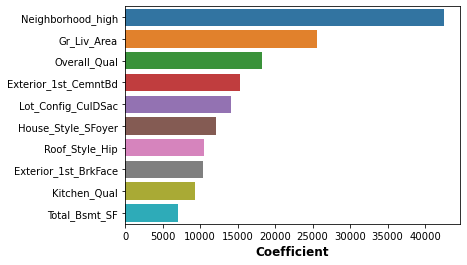

In [121]:
coe_list = np.argsort(-lasso_selected.coef_)[:10]
features_list = np.array(['Neighborhood_high', 'Gr_Liv_Area', 'Overall_Qual', 'Exterior_1st_CemntBd', 
                 'Lot_Config_CulDSac', 'House_Style_SFoyer', 'Roof_Style_Hip',
                 'Exterior_1st_BrkFace', 'Kitchen_Qual', 'Total_Bsmt_SF'])
create_barplot(lasso_selected.coef_[coe_list], features_list)

Below is the table that show the information and results of the 5 different models that are submitted to Kaggle. 

|  | Description | Hyperparameters | Number of Features | CV RMSE | Kaggle RMSE|
| :-: | :-: | :-: | :-: | :-: |:-:|
| Model 1 | Linear Regression | - | 2 | 49996.5 | 46816.55 |
| Model 2 | Linear Regression | - | 85 | 34992.97 | 35610.13 |
| Model 3 | Ridge Regression | alpha = 26 | 85 | 34541.8 | 34482.18 |
| Model 4 | Lasso Regression | alpha = 97.7 | 38 | 34328.89 | 34264.73 |
| Model 5 | ElasticNet Regression | alpha = 0.02, l1_ratio = 0.3 | 85 | 34546.9 | 34441.81 |

From the results we get from Kaggle, the Lasso regression model get the best results in terms of root mean square error (RMSE). In addtion to having the best performance among the 5 models, Lasso regression model also results in more than 50% reduction in the features required in predicting the sale price of a house. With less features to compute, the Lasso regression still can achieve the best performance, therefore I would recommend to use Lasso model for the prediction of sale price. The Lasso regression also show that the top 3 predictors are the location of the house (Neighborhood), the total living area above ground (Gr Liv Area) and the overall quality of the house (Overall Qual). 

One thing to take note of the Lasso regression model is that the actual test dataset has a better RMSE than the train dataset. This might due to overfitting, hence the model can still be improved by re-iterating and check which of the features can be filtered out to avoid overfitting.

## Summary

Unlike the previous section, the train dataset in this section is mainly used as the training datset while a new unseen test dataset is used to predict the sale price. Hence with a new test dataset, data cleaning is required to be done on the test data set and then the test dataset is filtered to the features that are previously defined to have an influence on the sale price prediction. Like in the previous section, one hot encoding and standard scaling need to be done on the train and test dataset before fitting to the models.

From the results we get from Kaggle, the Lasso regression model get the best results in terms of root mean square error (RMSE). In addtion to having the best performance among the 5 models, Lasso regression model also results in results in more than 50% reduction in the features required in predicting the sale price of a house. With less features to compute, the Lasso regression still can achieve the best performance, therefore I would recommend to use Lasso model for the prediction of sale price. The Lasso regression also show that the top 3 predictors are the location of the house (Neighborhood), the total living area above ground (Gr Liv Area) and the overall quality of the house (Overall Qual). 

One thing to take note of the Lasso regression model is that the actual test dataset has a better RMSE than the train dataset. This might due to overfitting, hence the model can still be improved by re-iterating and check which of the features can be filtered out to avoid overfitting.

However, in reality, alot of other factors not included in the present dataset can affect the sale price of a property. Hence, the aim of this model is to act as a guideline for sellers/buyers as well as property agents to have a estimate range of price given the features of a property.